<a href="https://colab.research.google.com/github/Asalghaani/IMDB--Analysis/blob/main/Notebooks/IMDB_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
url = "https://raw.githubusercontent.com/Asalghaani/IMDB--Analysis/refs/heads/main/Data/imdb_top_1000.csv"
df = pd.read_csv(url)
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


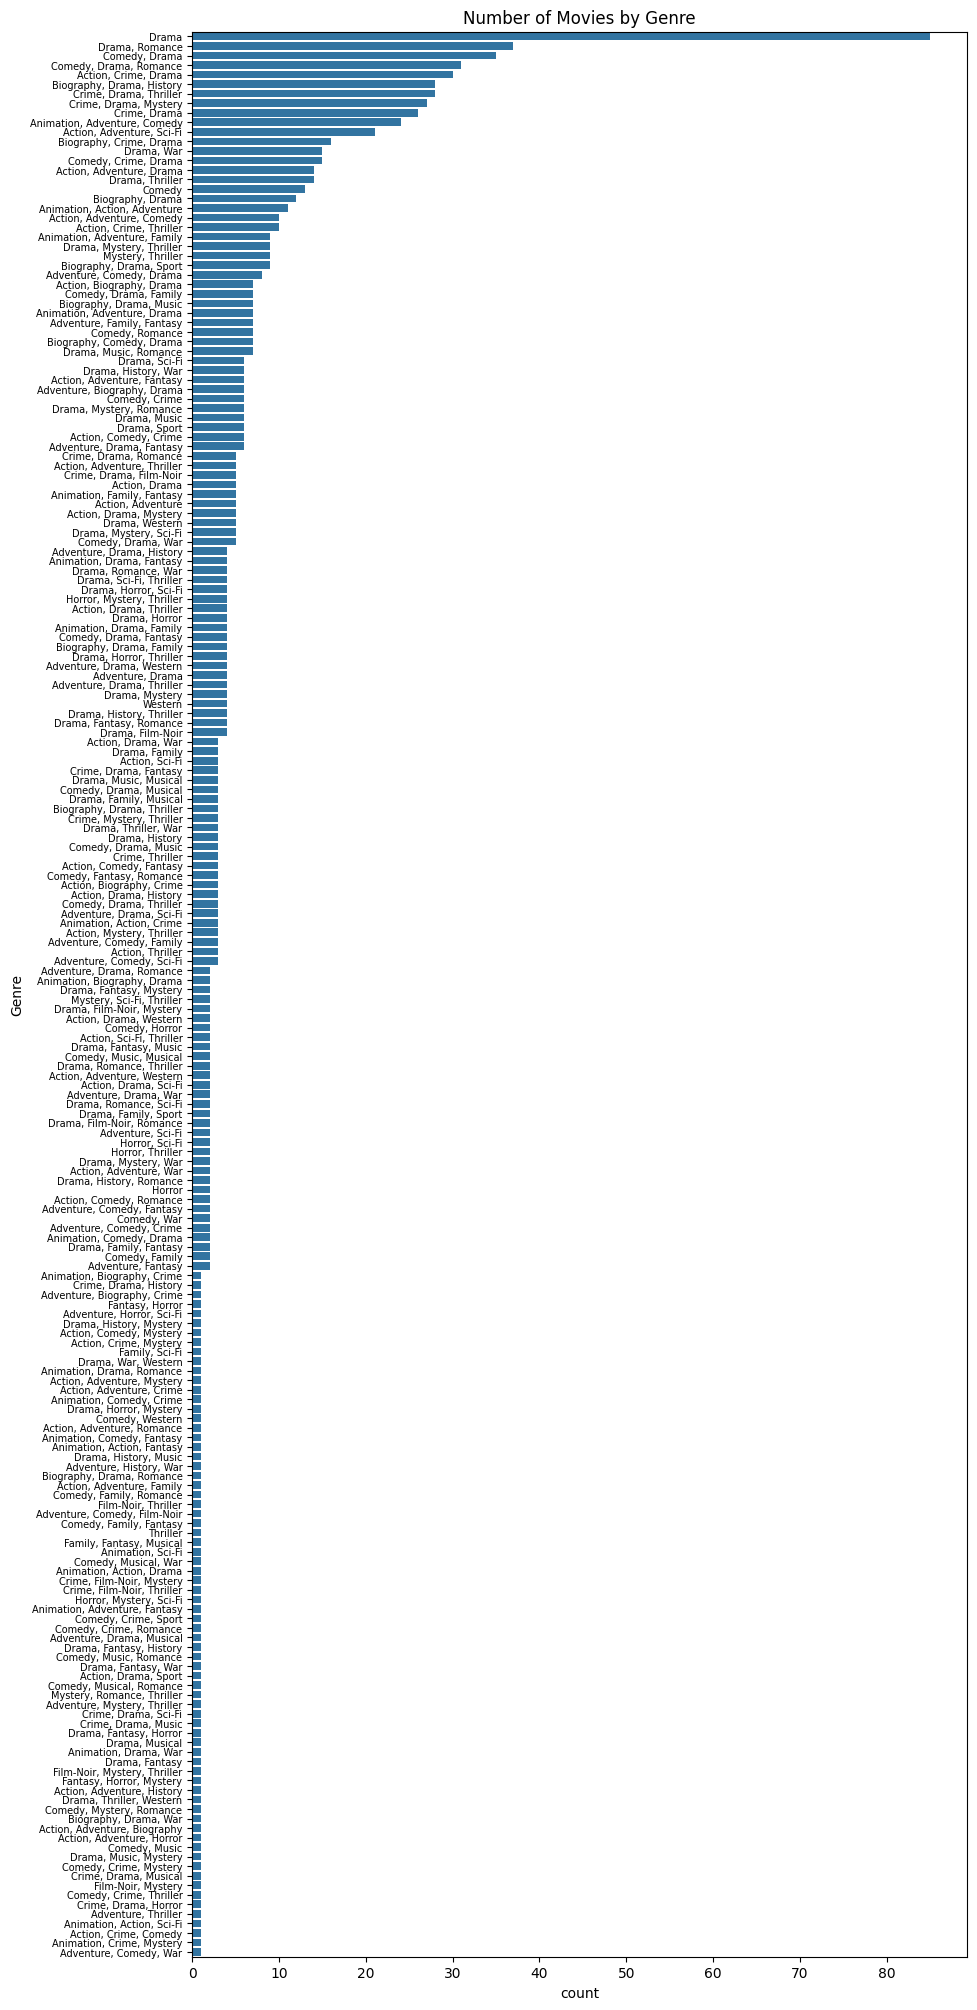

In [ ]:
plt.figure(figsize=(10, 25))
sns.countplot(y=df['Genre'],order=df['Genre'].value_counts().index)
plt.title('Number of Movies by Genre')
plt.xticks(fontsize=10)
plt.yticks(fontsize=7)
plt.show()

In [ ]:
df['IMDB_Rating'].mean()

7.949299999999999

<ipython-input-7-bacb8940a6ec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.groupby("Genre")["IMDB_Rating"].mean().index,


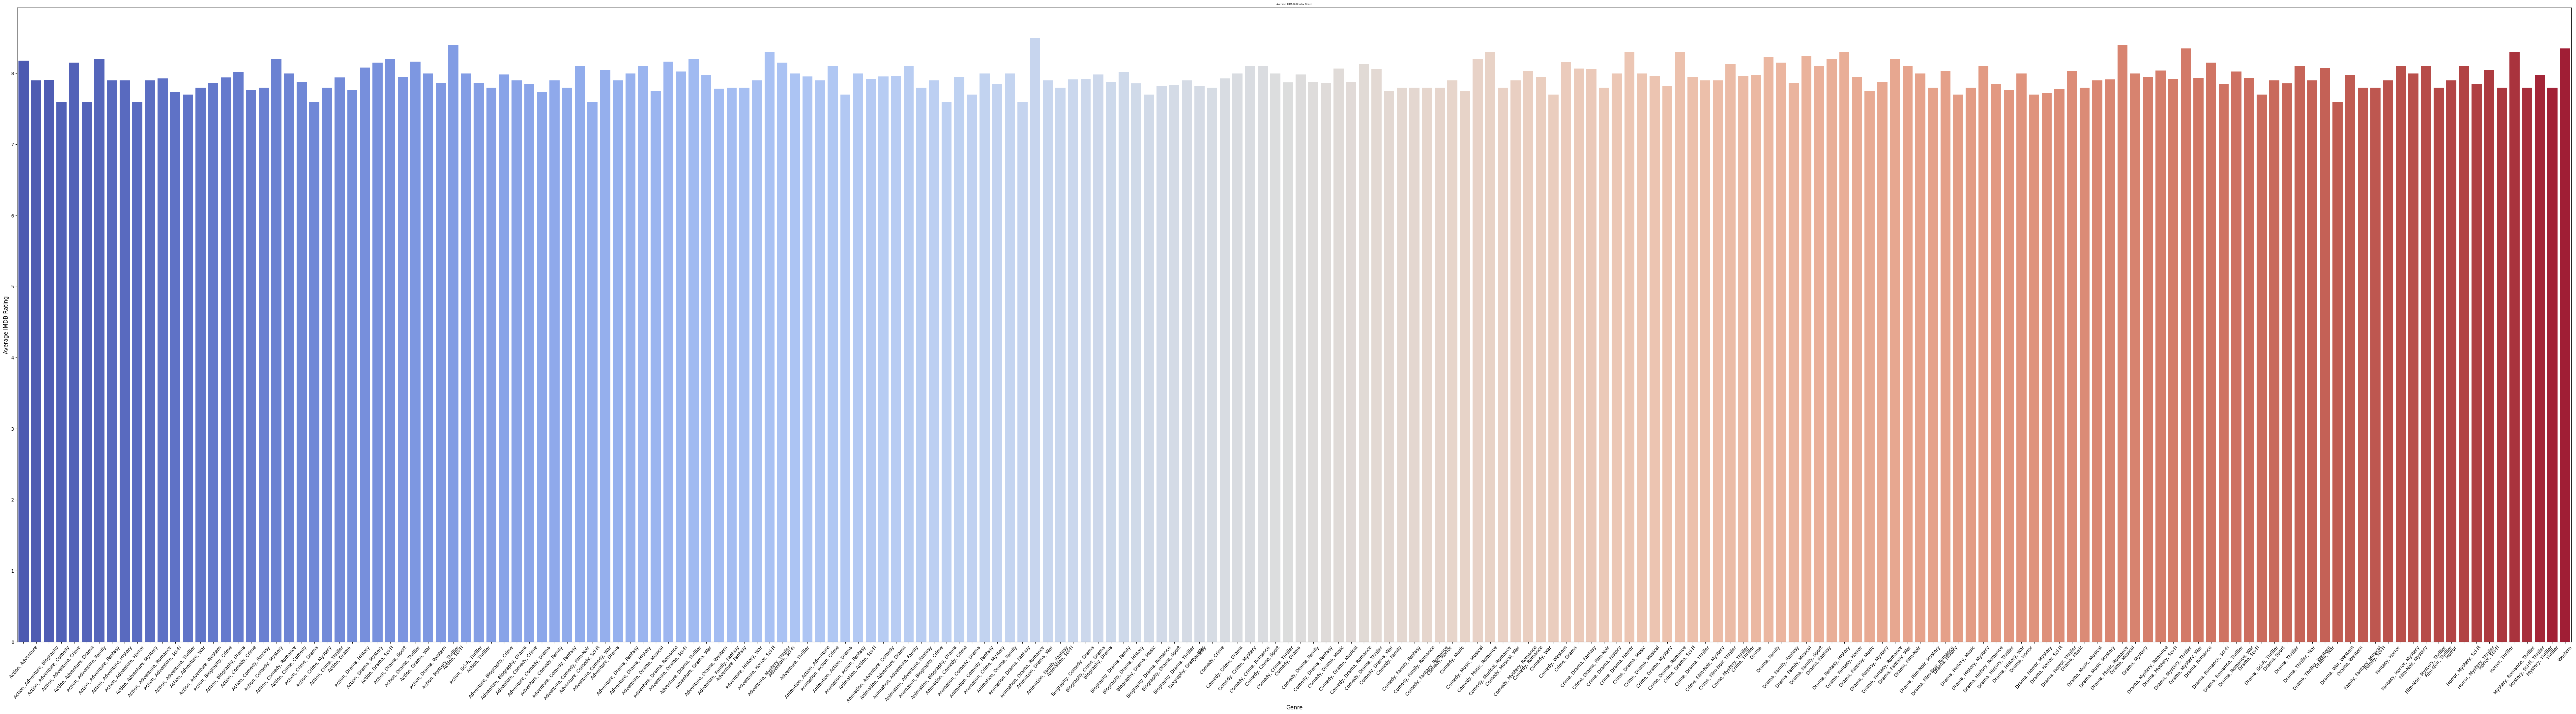

In [ ]:
plt.figure(figsize=(100,25))

sns.barplot(x=df.groupby("Genre")["IMDB_Rating"].mean().index,
            y=df.groupby("Genre")["IMDB_Rating"].mean().values,
            palette = "coolwarm")
plt.xticks(rotation=50)
plt.title("Average IMDB Rating by Genre", fontsize = 5)
plt.xlabel("Genre", fontsize = 12)
plt.ylabel("Average IMDB Rating", fontsize = 12)
plt.show()

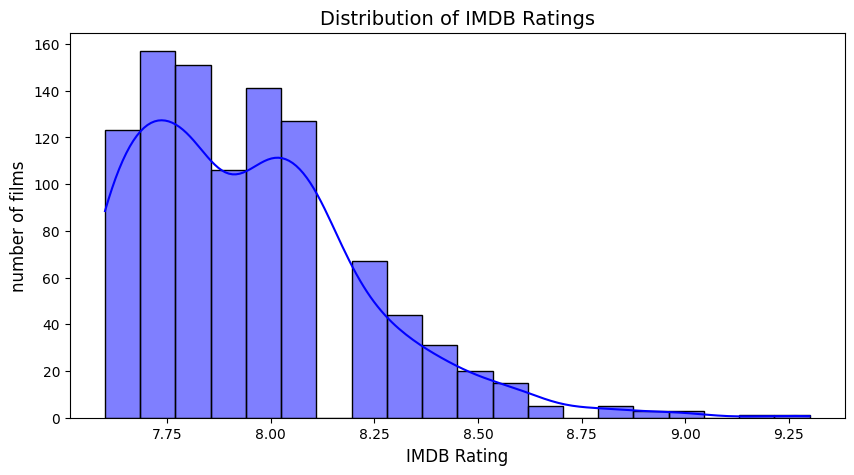

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True , color="blue")
plt.title('Distribution of IMDB Ratings', fontsize=14)
plt.xlabel('IMDB Rating',fontsize=12)
plt.ylabel('number of films',fontsize=12)
plt.show()

<ipython-input-6-31480ea8fa62>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_movies["Series_Title"], y=top_movies["Gross"], palette="magma")


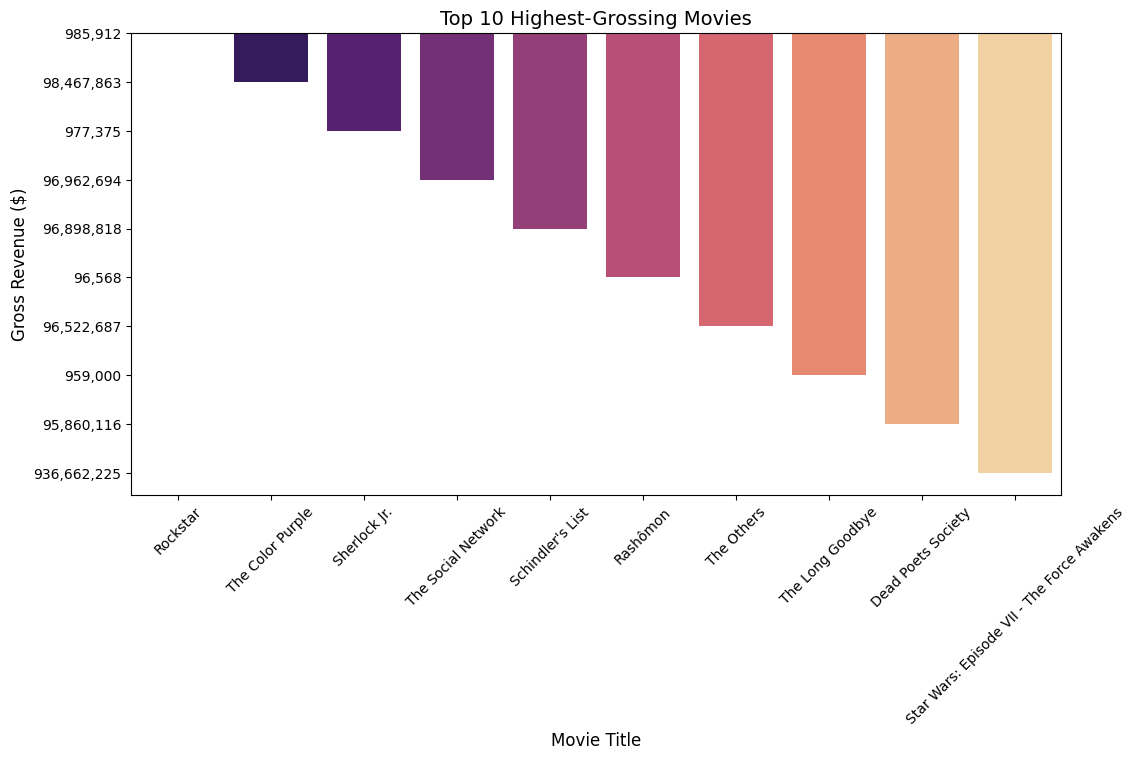

In [6]:
top_movies = df.sort_values("Gross", ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_movies["Series_Title"], y=top_movies["Gross"], palette="magma")
plt.xticks(rotation=45)
plt.title("Top 10 Highest-Grossing Movies", fontsize=14)
plt.xlabel("Movie Title", fontsize=12)
plt.ylabel("Gross Revenue ($)", fontsize=12)
plt.show()

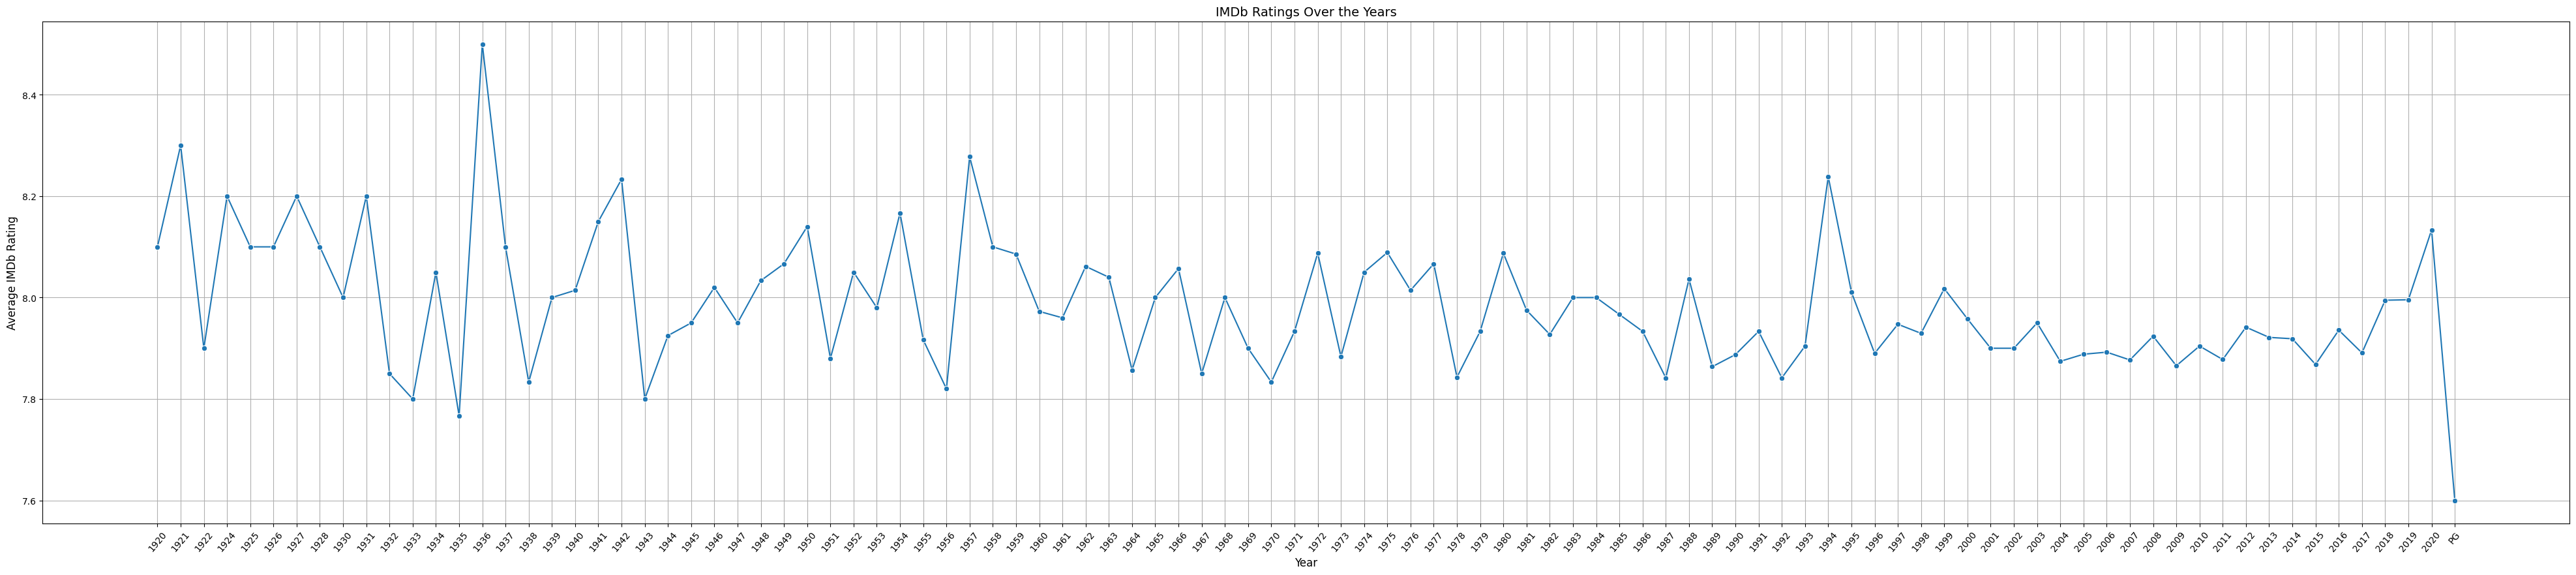

In [10]:
yearly_ratings = df.groupby("Released_Year")["IMDB_Rating"].mean().reset_index()
plt.figure(figsize=(50,10))
sns.lineplot(x=yearly_ratings["Released_Year"], y=yearly_ratings["IMDB_Rating"], marker="o")
plt.title("IMDb Ratings Over the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.xticks(rotation=50)
plt.ylabel("Average IMDb Rating", fontsize=12)
plt.grid(True)
plt.show()

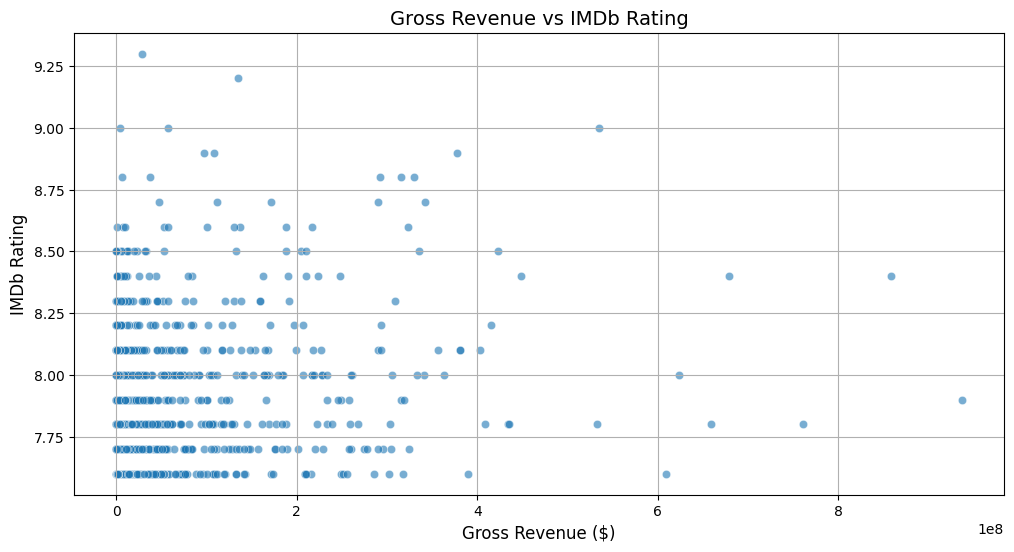

In [15]:
df["Gross"] = pd.to_numeric(df["Gross"].astype(str).str.replace(",", ""), errors="coerce")

df_cleaned = df.dropna(subset=["Gross", "IMDB_Rating"])

plt.figure(figsize=(12,6))
sns.scatterplot(x=df_cleaned["Gross"], y=df_cleaned["IMDB_Rating"], alpha=0.6)
plt.title("Gross Revenue vs IMDb Rating", fontsize=14)
plt.xlabel("Gross Revenue ($)", fontsize=12)
plt.ylabel("IMDb Rating", fontsize=12)
plt.grid(True)
plt.show()


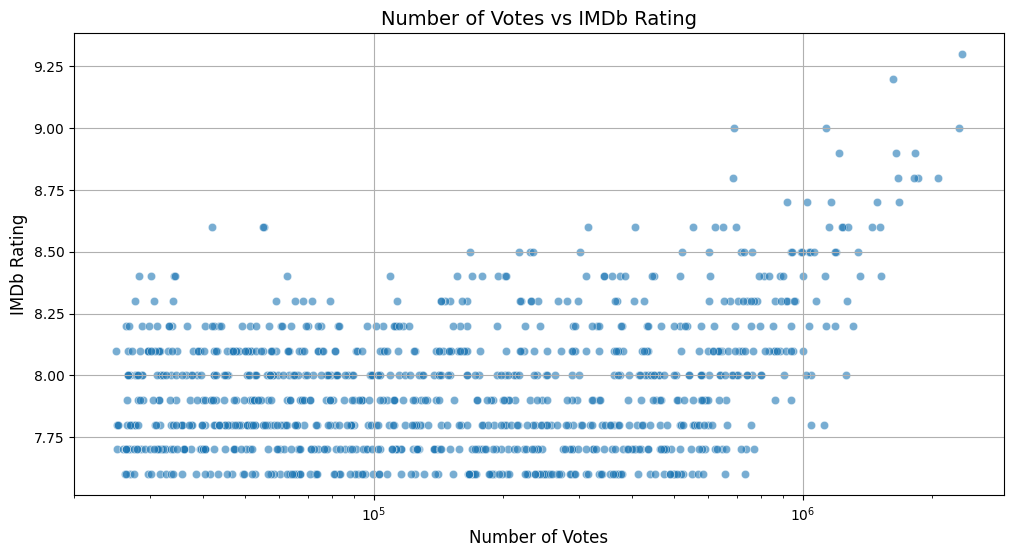

In [13]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df["No_of_Votes"], y=df["IMDB_Rating"], alpha=0.6)
plt.title("Number of Votes vs IMDb Rating", fontsize=14)
plt.xlabel("Number of Votes", fontsize=12)
plt.ylabel("IMDb Rating", fontsize=12)
plt.xscale("log")
plt.grid(True)
plt.show()